<a href="https://colab.research.google.com/github/kadilrahman/Diabetes-Prediction/blob/master/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using support vector machine

1. load dataset
2. data pre processing
3. traning and testing split
4. defining model
5. Evaluation

## Loading dataset

In [65]:
#used for processing data in for of arrays
import numpy as np
#used for creating data frames
import pandas as pd
#used for standarding the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [66]:
!gdown 1RgsebZtcAF7UJxOOjWoMYg-_OlVDf9c1

Downloading...
From: https://drive.google.com/uc?id=1RgsebZtcAF7UJxOOjWoMYg-_OlVDf9c1
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 66.4MB/s]


In [67]:
data = pd.read_csv('/content/diabetes.csv')

In [68]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [70]:
data.shape

(768, 9)

In [71]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
print(data.isnull())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [73]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [74]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


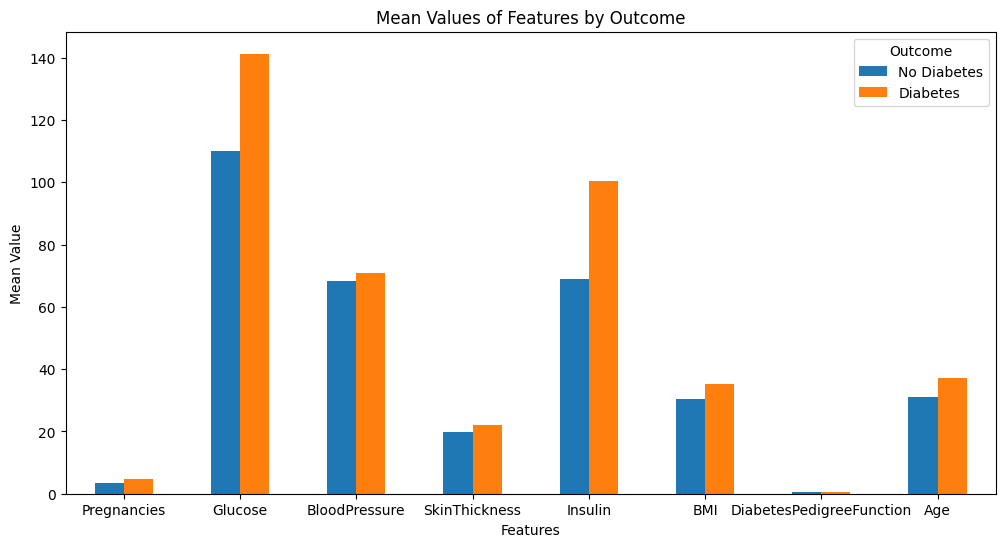

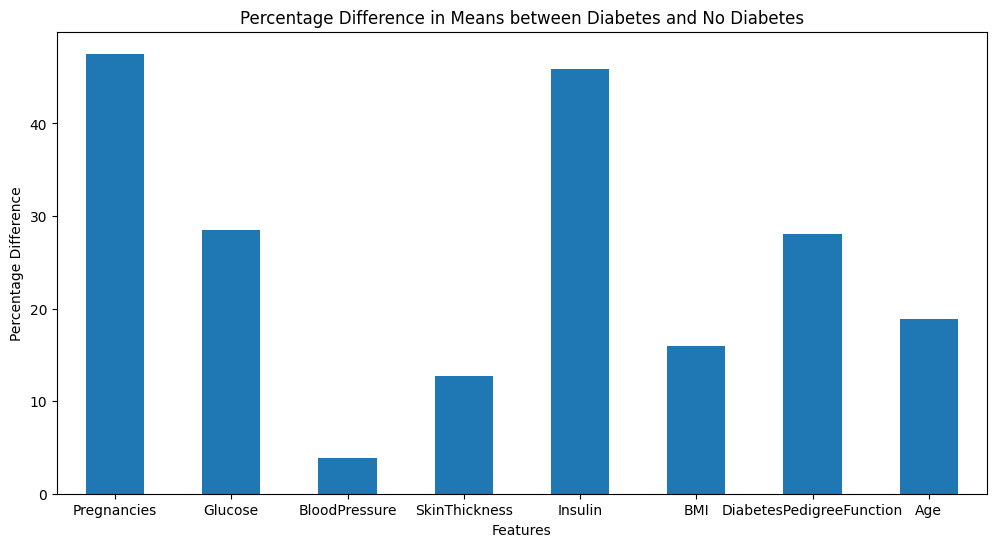

In [75]:
import matplotlib.pyplot as plt

# Group the data by 'Outcome' and calculate the mean of each feature for each group
grouped_means = data.groupby('Outcome').mean()

# Calculate the percentage difference in means
percentage_difference = ((grouped_means.iloc[1] - grouped_means.iloc[0]) / grouped_means.iloc[0]) * 100

# Transpose the grouped data for easier plotting
grouped_means = grouped_means.T

# Plot the means for each feature
grouped_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values of Features by Outcome')
plt.ylabel('Mean Value')
plt.xlabel('Features')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

# Plot the percentage difference for each feature
percentage_difference.plot(kind='bar', figsize=(12, 6))
plt.title('Percentage Difference in Means between Diabetes and No Diabetes')
plt.ylabel('Percentage Difference')
plt.xlabel('Features')
plt.xticks(rotation=0)
plt.show()




We will check the performance of the model by adding in more features or all features

## Preprocessing data

Seperating labels

In [76]:
 tdata = data.drop(columns='Outcome', axis=1)
 label = data['Outcome']

In [77]:
print(tdata)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [78]:
print(label)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data standardisation

In [79]:
scaler = StandardScaler()
scaler.fit(tdata)


StandardScaler()

In [80]:
standardised_data = scaler.transform(tdata)

In [81]:
print(standardised_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [82]:
datat = standardised_data


In [83]:
print(datat)
print(label)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Splitting dataset

In [84]:
X_train, X_test, y_train, y_test = train_test_split(datat, label, test_size = 0.2, stratify = label, random_state = 2)

In [85]:
print(datat.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training model

In [86]:
classifier = svm.SVC(kernel = 'linear')

In [87]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Evalutaion

In [ ]:
#accuracy of training
train_pred = classifier.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)

print('Accuracy score of training data : ', train_acc)

Accuracy score of training data :  0.7866449511400652


In [ ]:
#accuracy of test
test_pred = classifier.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)

print('Accuracy score of test data : ', test_acc)

Accuracy score of test data :  0.7727272727272727


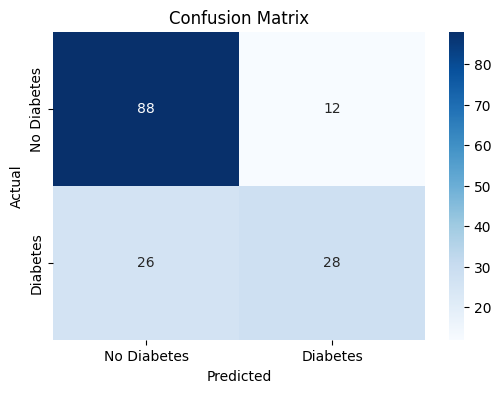

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


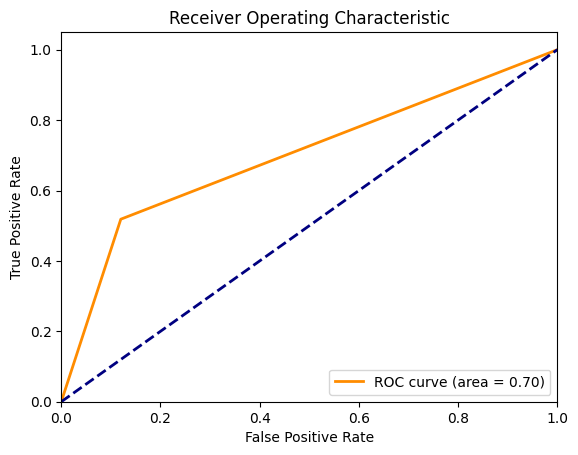

In [89]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, test_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Check for diabetes by entering the fields

In [ ]:
# pregnancies, glugose, bloodPressure, SkinThickness, insulin, BMI, Diabetesfunction, age

input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)

input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)

if prediction[0] == 0:
  print('The person is not Diabetic :)')
else :
  print('The person is Diabetic ')

The person is not Diabetic :)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



## Checking performance using top 4 features

In [57]:
 # Drop the specified columns
columns_to_drop = ['BloodPressure', 'SkinThickness', 'BMI', 'Age', 'Outcome']
tdata = data.drop(columns=columns_to_drop)

# The 'Outcome' column should be stored as 'label'
label = data['Outcome']

# Display the first few rows of the modified tdata DataFrame
print(tdata.head())


   Pregnancies  Glucose  Insulin  DiabetesPedigreeFunction
0            6      148        0                     0.627
1            1       85        0                     0.351
2            8      183        0                     0.672
3            1       89       94                     0.167
4            0      137      168                     2.288


In [58]:
scaler = StandardScaler()
scaler.fit(tdata)
standardised_data = scaler.transform(tdata)

In [59]:
datat = standardised_data
print(datat)

[[ 0.63994726  0.84832379 -0.69289057  0.46849198]
 [-0.84488505 -1.12339636 -0.69289057 -0.36506078]
 [ 1.23388019  1.94372388 -0.69289057  0.60439732]
 ...
 [ 0.3429808   0.00330087  0.27959377 -0.68519336]
 [-0.84488505  0.1597866  -0.69289057 -0.37110101]
 [-0.84488505 -0.8730192  -0.69289057 -0.47378505]]


In [60]:
X_train, X_test, y_train, y_test = train_test_split(datat, label, test_size = 0.2, stratify = label, random_state = 2)
print(datat.shape, X_train.shape, X_test.shape)

(768, 4) (614, 4) (154, 4)


In [61]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
#accuracy of training
train_pred = classifier.predict(X_train)
train_acc = accuracy_score(train_pred, y_train)

print('Accuracy score of training data : ', train_acc)

Accuracy score of training data :  0.757328990228013


In [63]:
#accuracy of test
test_pred = classifier.predict(X_test)
test_acc = accuracy_score(test_pred, y_test)

print('Accuracy score of test data : ', test_acc)

Accuracy score of test data :  0.7532467532467533


In [64]:
# pregnancies, glugose, bloodPressure, SkinThickness, insulin, BMI, Diabetesfunction, age

input_data = (4, 110, 0, 0.191)

input_data_np = np.asarray(input_data)
input_data_reshaped = input_data_np.reshape(1, -1)

std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)

if prediction[0] == 0:
  print('The person is not Diabetic')
else :
  print('The person is Diabetic ')

The person is not Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**We see that using all features instead of the top 4 features performs well overall.**